In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from mcopt import MorseComplex, MorseGraph, MorseHypergraph

# Load Morse Complex

In [3]:
mc = MorseComplex.read('../gen_complexes/sinusoidal')

# Construct Graph and samplings

In [4]:
mg = MorseGraph.from_complex(mc)

mg_step = mg.sample(rate=8, mode='step')
mg_geo = mg.sample(rate=4, mode='geo')

# Draw Graphs

Text(0.5, 1.0, 'Geodesic sampling')

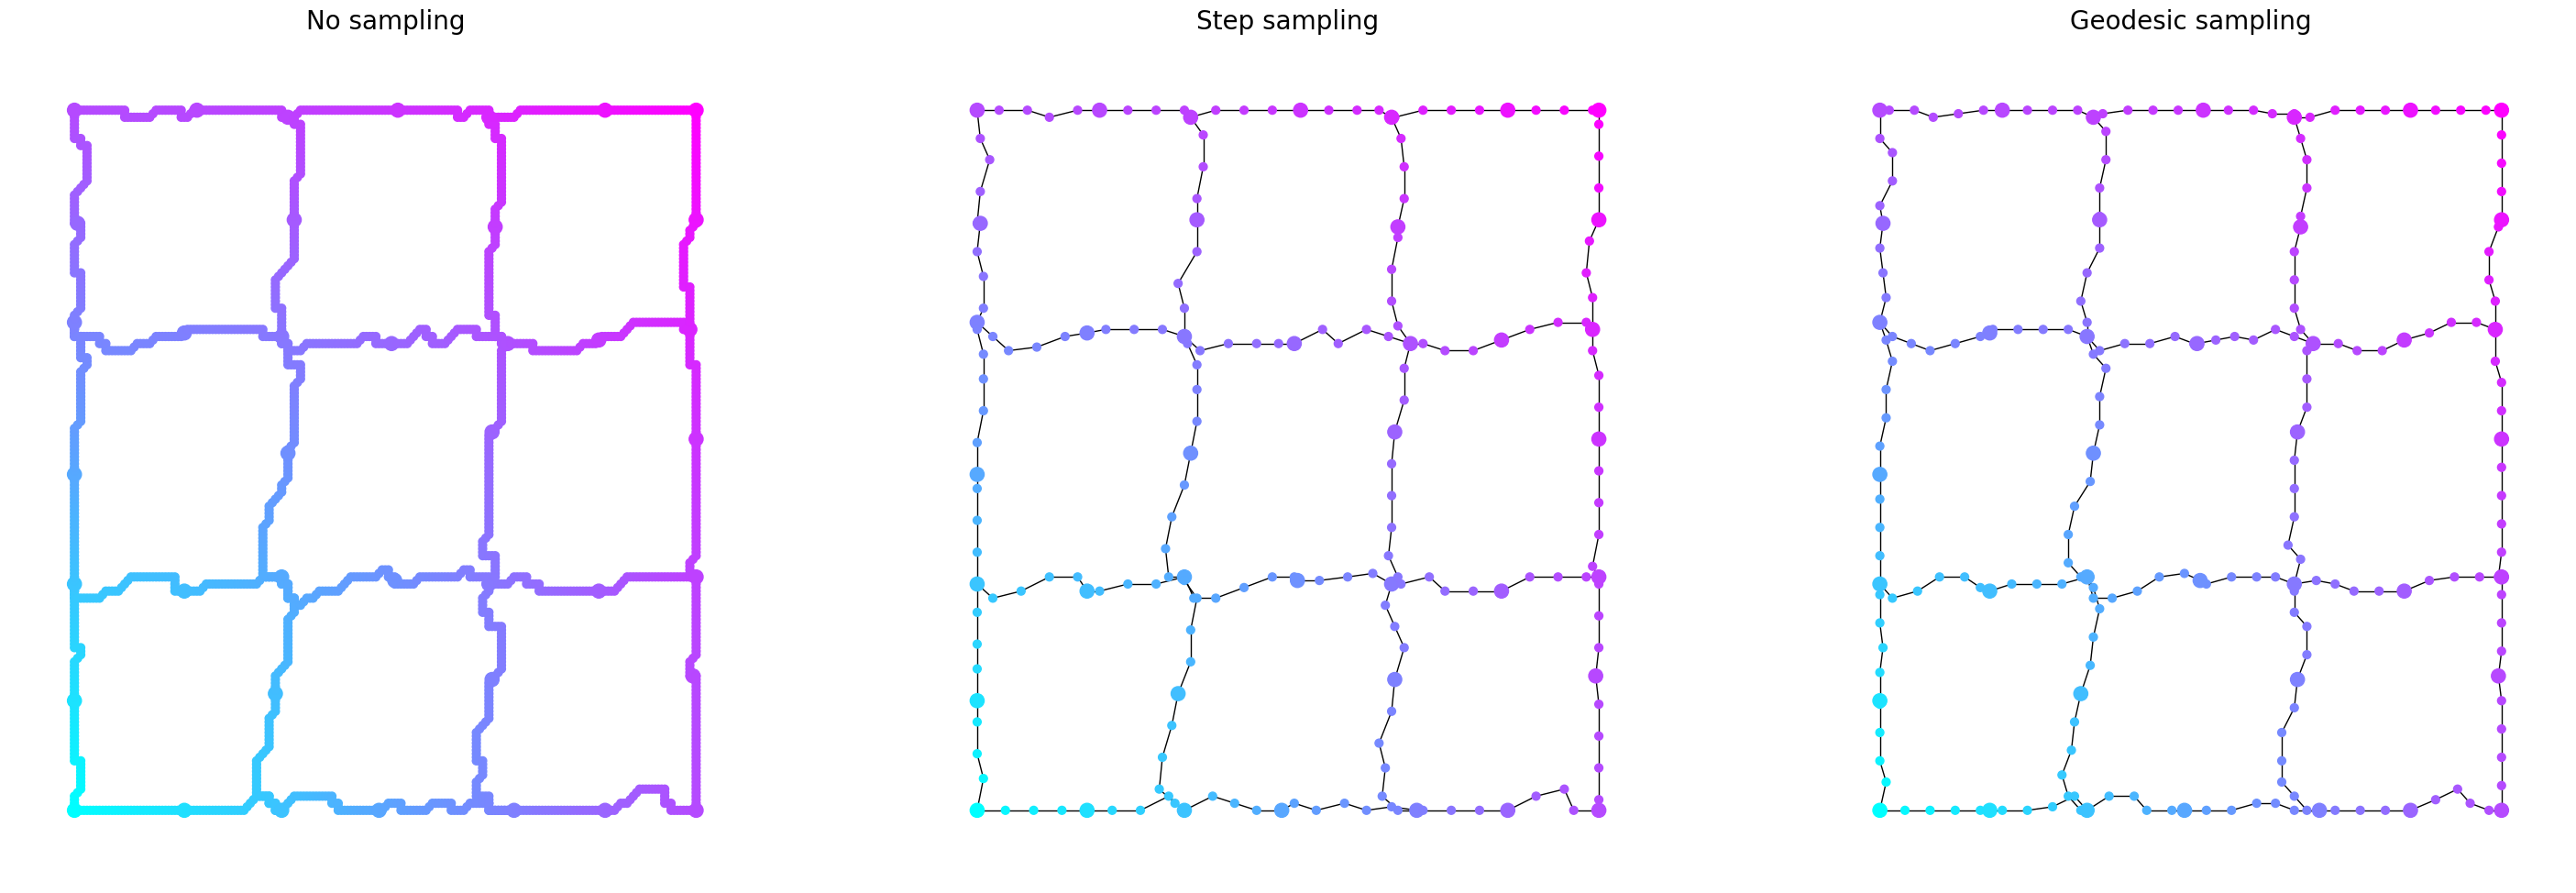

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(36, 12))
cmap = 'cool'

mg.draw(ax=axes[0], node_size=40, cmap=cmap)
axes[0].set_title('No sampling', fontsize=20)

mg_step.draw(ax=axes[1], node_size=40, cmap=cmap)
axes[1].set_title('Step sampling', fontsize=20)

mg_geo.draw(ax=axes[2], node_size=40, cmap=cmap)
axes[2].set_title('Geodesic sampling', fontsize=20)


# Hypergraphs

In [24]:
mgh_simple = MorseHypergraph.from_graph(mg_step)
mgh_neighbors = MorseHypergraph.from_graph(mg_step, 'neighbors')

Text(0.5, 1.0, 'Neighbors in same hyperedge')

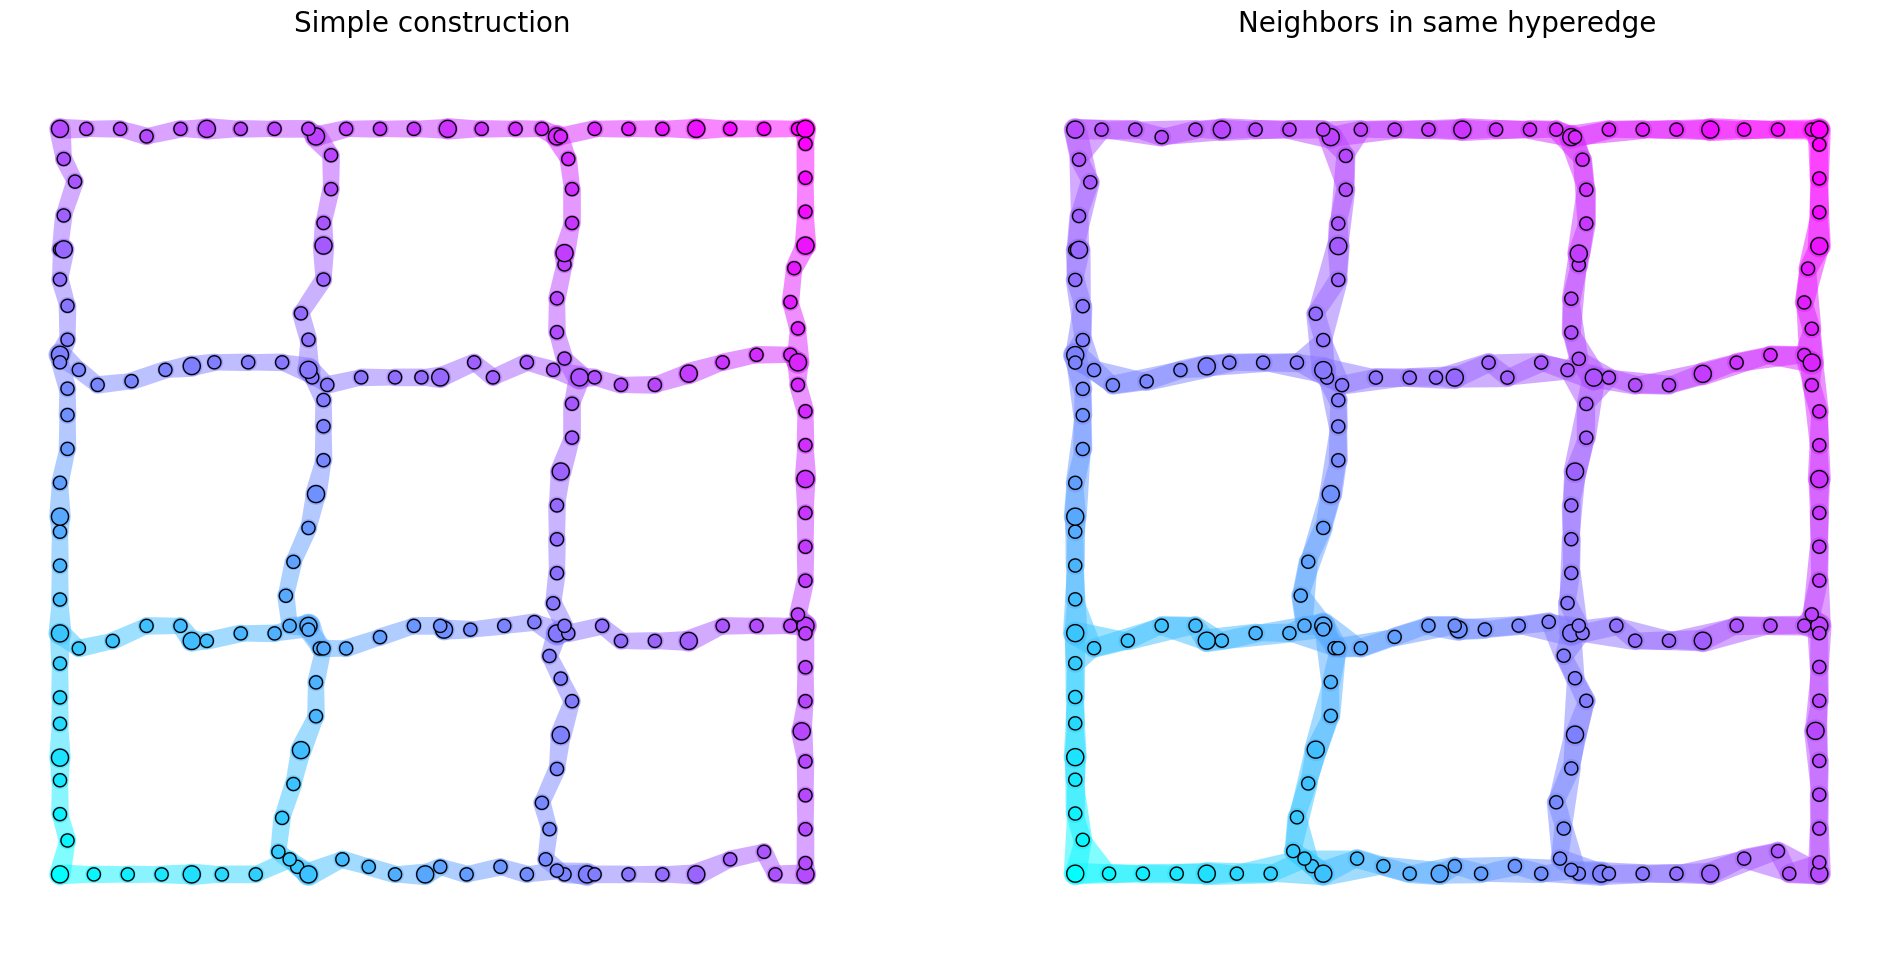

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

mgh_simple.draw(axes[0], cmap=cmap)
axes[0].set_title('Simple construction', fontsize=20)

mgh_neighbors.draw(axes[1], cmap=cmap)
axes[1].set_title('Neighbors in same hyperedge', fontsize=20)